In [1]:
import warnings

import numpy as np

warnings.filterwarnings("ignore")
import sys
a = sys.path.append('../modules/')
c = sys.path.append('../tests/')
import os
import pandas as pd

import random

import matplotlib.pyplot as plt


from datetime import datetime
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

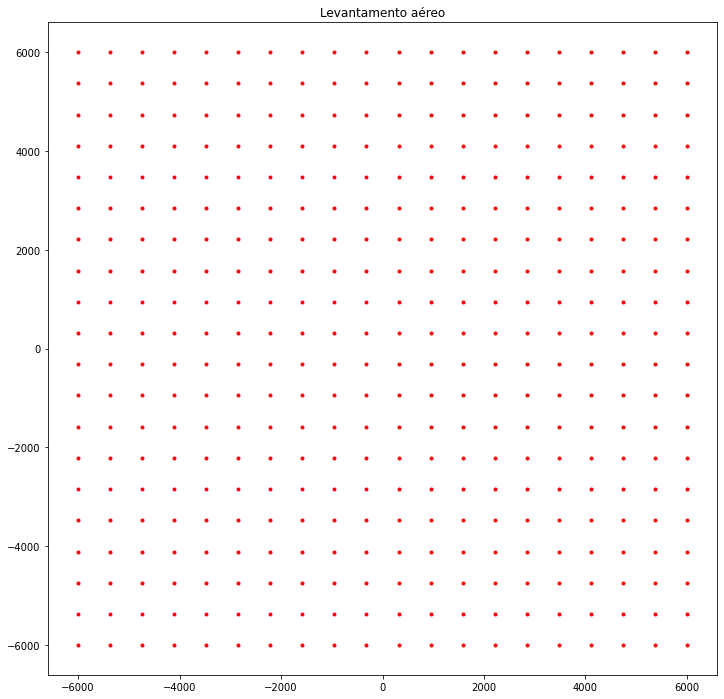

In [2]:
import genetic_algorithm as ga

In [3]:
populacao, anomaly_better, ind_better, val_fit, val_phi, val_theta, incl_better, decl_better, mom_better, diversity_x, diversity_y, diversity_z, diversity_incl, diversity_decl, diversity_mom, z_better = ga.ga(ga.lamb, ga.n, ga.anomaly_cubo, ga.filhos_mut, ga.population)

In [4]:
fit_rodada = val_fit
theta_rodada = val_theta
phi_rodada = val_phi
#shape_rodada = val_shape
incl_rodada = incl_better
decl_rodada = decl_better
z_rodada = z_better
mom_rodada = mom_better

n_fit = len(fit_rodada)
n_theta = len(theta_rodada)
n_phi = len(phi_rodada)

Y = ga.Y
X = ga.X
anomaly_cubo = ga.anomaly_cubo
anomaly_better = anomaly_better
first_anomaly = anomaly_better[0]
mid_anomaly = anomaly_better[int(n_fit/2)]
final_anomaly = anomaly_better[n_fit - 1]

print(fit_rodada[n_theta - 1])
print(theta_rodada[n_theta - 1])
print(phi_rodada[n_theta - 1])
print(incl_rodada[n_theta - 1])
print(decl_rodada[n_theta - 1])
print(f"{mom_rodada[n_theta - 1]:.3e}")

0.47455422217541776
0.03163685402277147
0.42709894114126057
-32.477107775539
-41.783302625524655
7.294e+08


In [5]:
#Erro relativo do Magnetic Moment
mom_verdadeiro = 8.4e9
mom_modelo = mom_rodada[n_theta - 1] * 5
error_percent = (np.abs(mom_modelo - mom_verdadeiro)/mom_verdadeiro) * 100
print(error_percent)

56.58528104211613


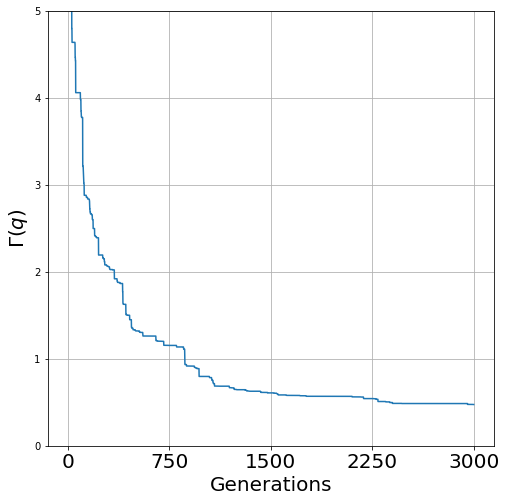

In [6]:
x_gama = np.linspace(0, n_fit, n_fit)
fig = plt.figure(figsize=(8, 8))
plt.plot(x_gama, fit_rodada)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\Gamma(q)$', fontsize=20)
plt.xticks(np.linspace(x_gama.min(), x_gama.max(), 5), fontsize = 20)
#plt.yticks(np.linspace(0, 7.5, 5), fontsize = 20)
plt.ylim(0, 5.0)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/09_09_2022_15_56/gamma.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/09_09_2022_15_56/gamma.pdf", dpi=300, bbox_inches='tight')
plt.show()

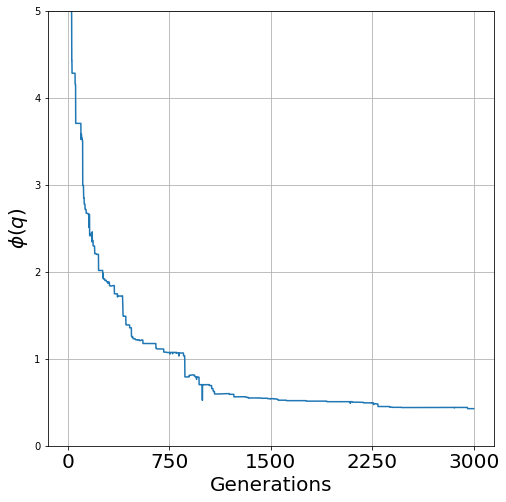

In [7]:
x_phi = np.linspace(0, n_fit, n_fit)
#print(len(x))
#print(phi_rodada)
fig = plt.figure(figsize=(8, 8))
plt.plot(x_phi, phi_rodada)
plt.ylim(0, 5.0)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\phi(q)$', fontsize=20)
plt.xticks(np.linspace(x_phi.min(), x_phi.max(), 5), fontsize = 20)
#plt.yticks(np.linspace(0, 7.5, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/09_09_2022_15_56/phi.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/09_09_2022_15_56/phi.pdf", dpi=300, bbox_inches='tight')
plt.show()

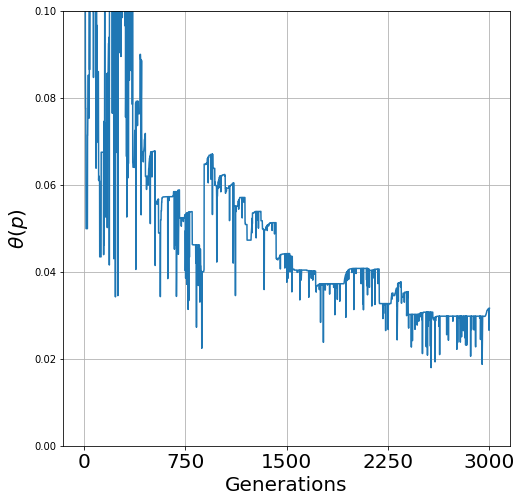

In [8]:
x_theta = np.linspace(0, n_theta, n_theta)
fig = plt.figure(figsize=(8, 8))
plt.plot(x_theta, theta_rodada)
plt.ylim(0,.1)
#plt.title('Theta com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$\\theta(p)$', fontsize=20)
plt.xticks(np.linspace(x_theta.min(), x_theta.max(), 5), fontsize = 20)
#plt.yticks(np.linspace(0, 10000, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/09_09_2022_15_56/theta.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/09_09_2022_15_56/theta.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
'''x_shape = np.linspace(0, n_fit, n_fit)
#print(len(x))
#print(phi_rodada)
fig = plt.figure(figsize=(8, 8))
plt.plot(x_shape, shape_rodada)
#plt.ylim(0, 7.0)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('shape $(q)$', fontsize=20)
plt.xticks(np.linspace(x_shape.min(), x_shape.max(), 5), fontsize = 20)
#plt.yticks(np.linspace(0, 7.5, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/23_08_2022_17_20/phi.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/23_08_2022_17_20/phi.pdf", dpi=300, bbox_inches='tight')
plt.show()'''

'x_shape = np.linspace(0, n_fit, n_fit)\n#print(len(x))\n#print(phi_rodada)\nfig = plt.figure(figsize=(8, 8))\nplt.plot(x_shape, shape_rodada)\n#plt.ylim(0, 7.0)\n#plt.title(\'Com o Lamb = 0.005\', fontsize=20)\nplt.xlabel(\'Generations\', fontsize=20)\nplt.ylabel(\'shape $(q)$\', fontsize=20)\nplt.xticks(np.linspace(x_shape.min(), x_shape.max(), 5), fontsize = 20)\n#plt.yticks(np.linspace(0, 7.5, 5), fontsize = 20)\nplt.grid()\n#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/23_08_2022_17_20/phi.png", dpi=300, bbox_inches=\'tight\')\n#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/23_08_2022_17_20/phi.pdf", dpi=300, bbox_inches=\'tight\')\nplt.show()'

In [10]:
melhores_ind = ind_better
momento = ga.momento
I = ga.I
D = ga.D

frist_ind = melhores_ind[0]
mid_ind = melhores_ind[int(n_fit/2)]
last_ind = melhores_ind[n_fit - 1]

In [11]:
def divide_param_dipolo(pop):
    coodX1 = []
    coodY1 = []
    coodZ1 = []
    incl1 = []
    decl1 = []
    mag1 = []

    for i in range(len(pop)-1):
        coodX1.append(pop[i][0])
        coodY1.append(pop[i][1])
        coodZ1.append(pop[i][2])
        incl1.append(pop[len(pop)-1][0])
        decl1.append(pop[len(pop)-1][1])
        mag1.append(pop[len(pop)-1][2])
    return coodX1, coodY1, coodZ1, incl1, decl1, mag1

coodX1, coodY1, coodZ1, incl1, decl1, mag1 = divide_param_dipolo(frist_ind)
coodX2, coodY2, coodZ2, incl2, decl2, mag2 = divide_param_dipolo(mid_ind)
coodX3, coodY3, coodZ3, incl3, decl3, mag3 = divide_param_dipolo(last_ind)
#print(coodX3)
#print(coodY3)
print(max(coodZ3))
print(f"{mag3[0]:.3e}")

1325.5542089440646
7.294e+08


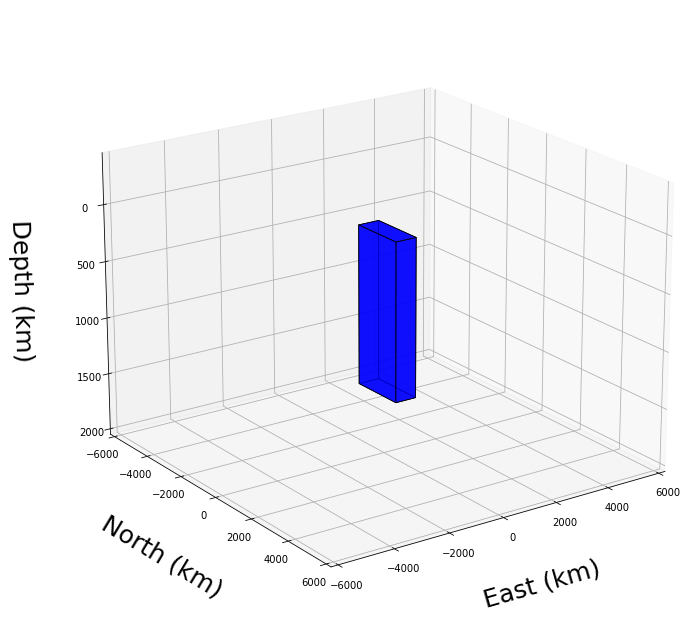

In [12]:
x = ga.x
y = ga.y
#z = top.z

x1,x2  = (-250.0, 500.0)
y1,y2 = (-1000.0, 1000.0)
z1,z2  = (100.0, 1500.0)   # z eh positivo para baixo!
deltaz = 600.0
deltay = 1000.0
deltax = 1500.0
incl = 'positivo'

dic = {'n': 1,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'deltax': deltax,
       'incl': incl,
       'merg': 'x'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)


dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

'''dic2 = {'x': [pointx[2], pointx[3]],
        'y': [pointy[2], pointy[3]],
        'z': [pointz[2], pointz[3]]}

dic3 = {'x': [pointx[4], pointx[5]],
        'y': [pointy[4], pointy[5]],
        'z': [pointz[4], pointz[5]]}

dic4 = {'x': [pointx[6], pointx[7]],
        'y': [pointy[6], pointy[7]],
        'z': [pointz[6], pointz[7]]}'''

'''dic5 = {'x': [pointx[8], pointx[9]],
        'y': [pointy[8], pointy[9]],
        'z': [pointz[8], pointz[9]]}'''
#----------------------------------------------------------------------------------------------------#
vert1 =  plot_3D.vert_point(dic1)
'''vert2 =  plot_3D.vert_point(dic2)
vert3 =  plot_3D.vert_point(dic3)
vert4 =  plot_3D.vert_point(dic4)
#vert5 =  plot_3D.vert_point(dic5)'''
#----------------------------------------------------------------------------------------------------#
color = 'b'
size = [9, 10]
view = [200,305]
#----------------------------------------------------------------------------------------------------#
prism_1 = plot_3D.plot_prism(vert1, color)
'''prism_2 = plot_3D.plot_prism(vert2, color)
prism_3 = plot_3D.plot_prism(vert3, color)
prism_4 = plot_3D.plot_prism(vert4, color)
#prism_5 = plot_3D.plot_prism(vert5, color)'''
#----------------------------------------------------------------------------------------------------#
prisma1 = {'n': 1,
         'prisma': [prism_1]}#, prism_2,prism_3, prism_4]}

plot_3D.plot_obs_3d(prisma1, size, view, x, y, pointz)

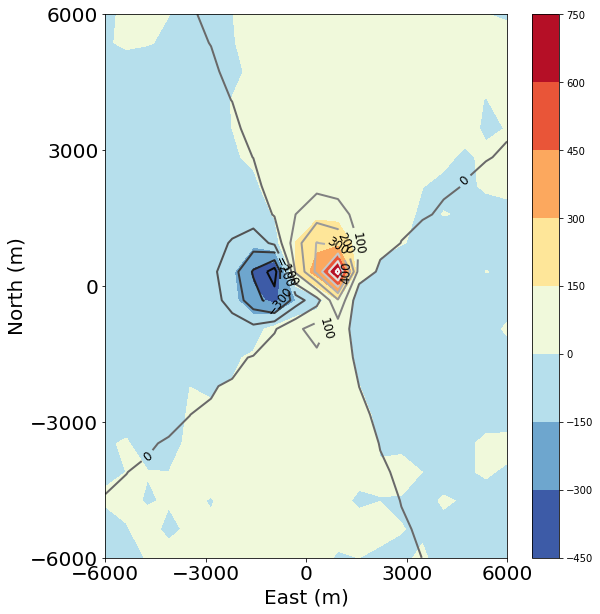

In [13]:
plt.figure(figsize=(9,10))
bolas = plt.contour(Y, X, final_anomaly, levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(final_anomaly), vmax = np.max(final_anomaly))
plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
#xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
#ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
#corpo = plt.plot(ys1,xs1,'k-')
cubo = plt.contourf(Y, X, anomaly_cubo, levels= 10, cmap = plt.cm.RdYlBu_r, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.xticks(np.linspace(Y.min(), Y.max(), 5), fontsize = 20)
plt.yticks(np.linspace(X.min(), X.max(), 5), fontsize = 20)
cbar = plt.colorbar()
#cbar.ax.set_yticklabels([-240, -160, -80, 0, 80, 160], fontsize = 20)
#plt.text(6900, 6200,'nT', fontsize = 20)
plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/09_09_2022_15_56/final_anomaly.png", dpi=300, bbox_inches='tight')
plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/09_09_2022_15_56/final_anomaly.pdf", dpi=300, bbox_inches='tight')
plt.show()

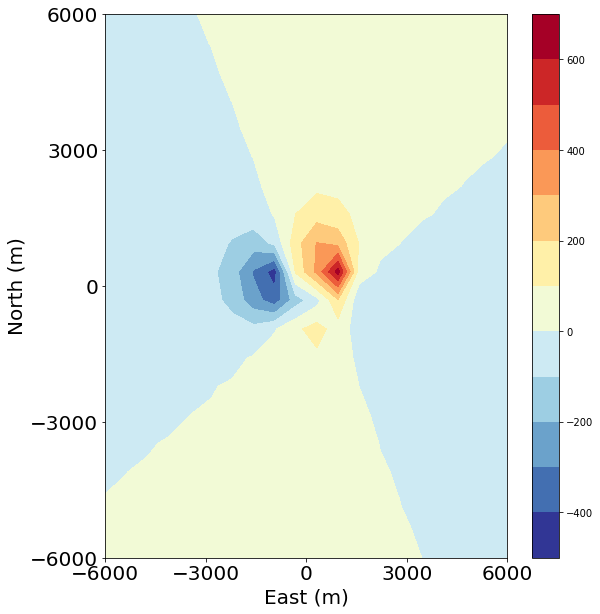

In [14]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(Y, X, final_anomaly, levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=15, colors = 'k')
cubo = plt.contourf(Y, X, final_anomaly, 10, cmap = plt.cm.RdYlBu_r, vmin = np.min(final_anomaly), vmax = np.max(final_anomaly))
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.xticks(np.linspace(Y.min(), Y.max(), 5), fontsize = 20)
plt.yticks(np.linspace(X.min(), X.max(), 5), fontsize = 20)
cbar = plt.colorbar()
#cbar.ax.set_yticklabels([-90, -60, -30, 0, 30, 60], fontsize = 20)
#plt.text(6900, 6200,'nT', fontsize = 20)
plt.show()

In [15]:
residuo_anomaly = anomaly_cubo - final_anomaly
residuo_anomaly_abs = np.abs(anomaly_cubo - final_anomaly)
res = np.reshape(residuo_anomaly, (400))
res_abs = np.reshape(residuo_anomaly_abs, (400))
#print(res)

res_mu = np.mean(res_abs)
res_sigma = np.std(res_abs)

res_mu1 = np.mean(res)
res_sigma1 = np.std(res)

max_res = np.max(res_abs)
print(res_mu, res_sigma, max_res)

from scipy.stats import norm

4.744146284718081 7.824699660137488 72.94281005449182


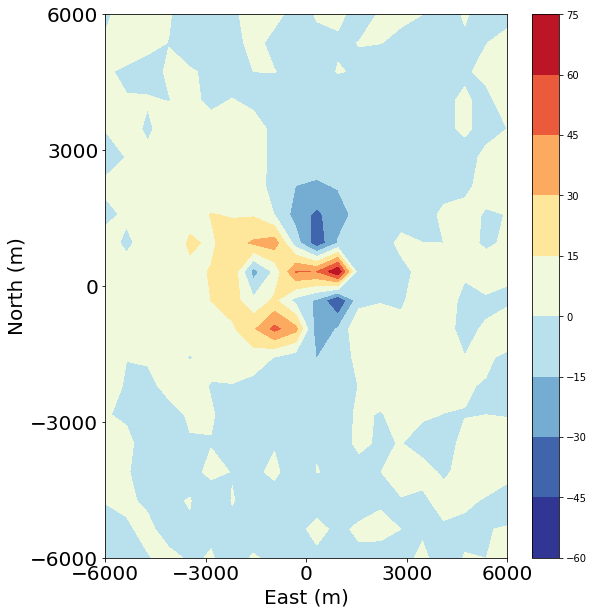

In [16]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(Y, X, final_anomaly, levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=15, colors = 'k')
cubo = plt.contourf(Y, X, residuo_anomaly, 10, cmap = plt.cm.RdYlBu_r, vmin = np.min(residuo_anomaly), vmax = np.max(residuo_anomaly))
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.xticks(np.linspace(Y.min(), Y.max(), 5), fontsize = 20)
plt.yticks(np.linspace(X.min(), X.max(), 5), fontsize = 20)
cbar = plt.colorbar()
#cbar.ax.set_yticklabels([-90, -60, -30, 0, 30, 60], fontsize = 20)
#plt.text(6900, 6200,'nT', fontsize = 20)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/residuo.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/residuo.pdf", dpi=300, bbox_inches='tight')
plt.show()

75


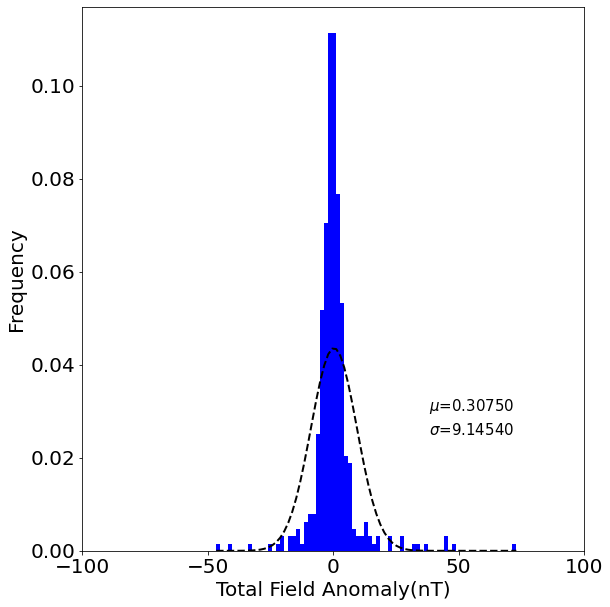

In [17]:
plt.figure(figsize=(9,10))
#s = (res - res_mu) / res_sigma
#s = np.ravel(s)
nbins = 75 #int(np.max(res) - np.min(res))
print(nbins)
n, bins, patches = plt.hist(res, nbins, facecolor = 'blue', alpha = 1., density=True)
y_hist = norm.pdf(bins, res_mu1, res_sigma1)
plt.plot(bins, y_hist, 'k--', linewidth = 2)
plt.xlabel('Total Field Anomaly(nT)', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(np.linspace(-100, 100, 5), fontsize = 20)
plt.yticks(fontsize = 20)
plt.text(55,0.030, '$\mu$=%0.5f' % (res_mu1), horizontalalignment = 'center', fontsize = 15)
plt.text(55,0.025, '$\sigma$=%0.5f' % (res_sigma1), horizontalalignment = 'center', fontsize = 15)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/hist.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/hist.pdf", dpi=300, bbox_inches='tight')
plt.show()


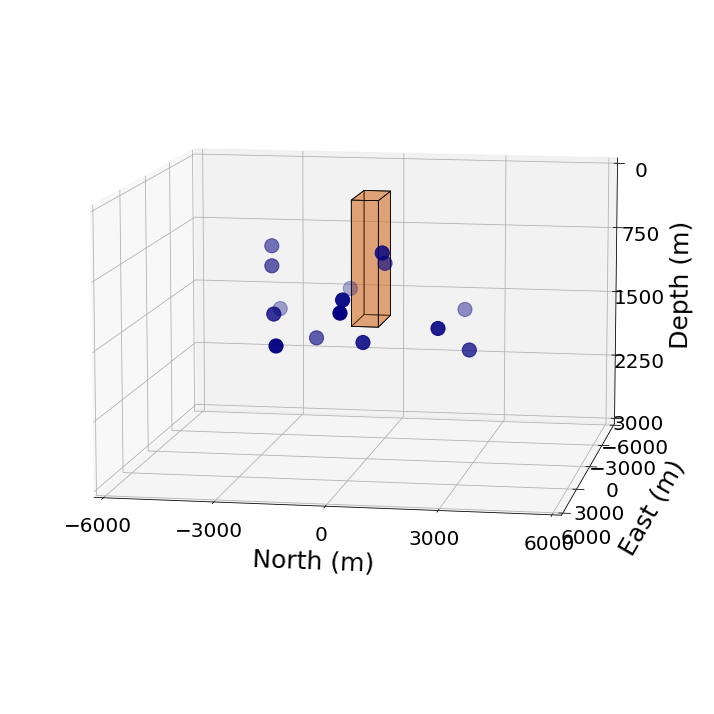

In [18]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')

fig01 = Poly3DCollection(vert1, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

'''fig02 = Poly3DCollection(vert2, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig02.set_facecolor('chocolate')
ax.add_collection3d(fig02)

fig03 = Poly3DCollection(vert3, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig03.set_facecolor('chocolate')
ax.add_collection3d(fig03)

fig04 = Poly3DCollection(vert4, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig04.set_facecolor('chocolate')
ax.add_collection3d(fig04)'''

'''fig05 = Poly3DCollection(vert5, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig05.set_facecolor('chocolate')
ax.add_collection3d(fig05)'''

individuo0 = ax.scatter(coodX1, coodY1, coodZ1, c=incl1, depthshade=True, cmap='jet', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(0., 3000)
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(y.min(), y.max(), 5))
ax.set_zticks(np.linspace(0, 3000, 5))
ax.tick_params(labelsize = 20, pad = 10)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)

# Visualization angle
ax.view_init(190,260)#335,245

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()

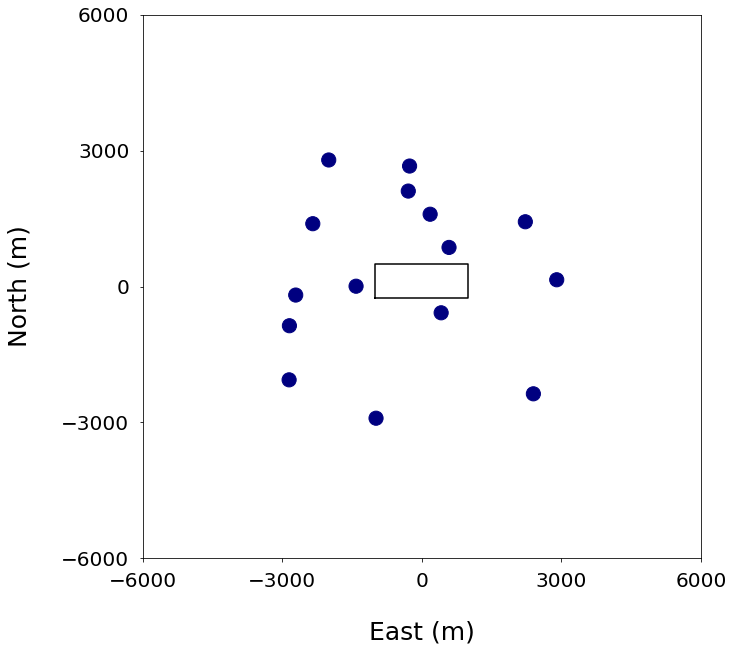

In [19]:
figure = plt.figure(figsize=(10,10))
ax = figure.gca()

individuo_0 = ax.scatter(coodX1, coodY1, c=incl1, cmap='jet', s = 200.0)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
corpo = plt.plot(ys1,xs1,'k-')

'''xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
corpo2 = plt.plot(ys2,xs2,'k-')

xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]
ys3 = [pointy[4], pointy[5], pointy[5], pointy[4], pointy[4]]
corpo3 = plt.plot(ys3,xs3,'k-')

xs4 = [pointx[6], pointx[6], pointx[7], pointx[7], pointx[6]]
ys4 = [pointy[6], pointy[7], pointy[7], pointy[6], pointy[6]]
corpo4 = plt.plot(ys4,xs4,'k-')'''

'''xs5 = [pointx[8], pointx[8], pointx[9], pointx[9], pointx[8]]
ys5 = [pointy[8], pointy[9], pointy[9], pointy[8], pointy[8]]
corpo5 = plt.plot(xs5,ys5,'k-')'''

# Labels
ax.set_xlabel('East (m)', size = 25, labelpad = 30)
ax.set_ylabel('North (m)', size = 25, labelpad = 30)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_yticks(np.linspace(Y.min(), Y.max(), 5))
ax.tick_params(labelsize = 20, pad = 10)

plt.show()

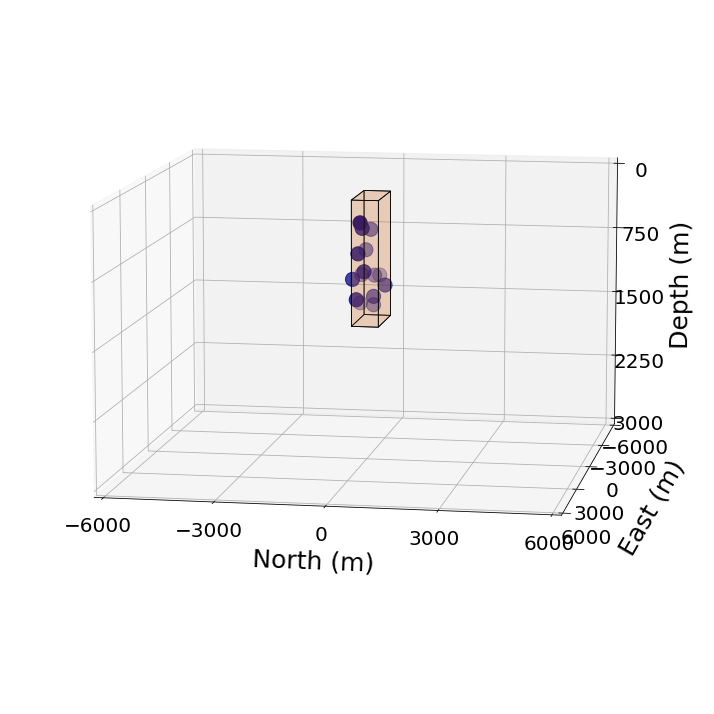

In [20]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')
#ax.set_title('Vertical dike model', size = 18)

#x1, x2, y1, y2, z1, z2 = fonte_crustal_mag[:6]
'''v = np.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vert =  [[v[0],v[1],v[2],v[3]], 
         [v[0],v[1],v[5],v[4]], 
         [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], 
         [v[3],v[0],v[4],v[7]], 
         [v[4],v[5],v[6],v[7]]]'''

fig01 = Poly3DCollection(vert1, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

'''fig02 = Poly3DCollection(vert2, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig02.set_facecolor('chocolate')
ax.add_collection3d(fig02)

fig03 = Poly3DCollection(vert3, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig03.set_facecolor('chocolate')
ax.add_collection3d(fig03)

fig04 = Poly3DCollection(vert4, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig04.set_facecolor('chocolate')
ax.add_collection3d(fig04)'''

'''fig05 = Poly3DCollection(vert5, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig05.set_facecolor('chocolate')
ax.add_collection3d(fig05)'''

individuo0 = ax.scatter(coodX2, coodY2, coodZ2, c=incl2, depthshade=True, cmap='jet', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(0., 3000)
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(y.min(), y.max(), 5))
ax.set_zticks(np.linspace(0, 3000, 5))
ax.tick_params(labelsize = 20, pad = 10)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)

# Visualization angle
ax.view_init(190,260)

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()

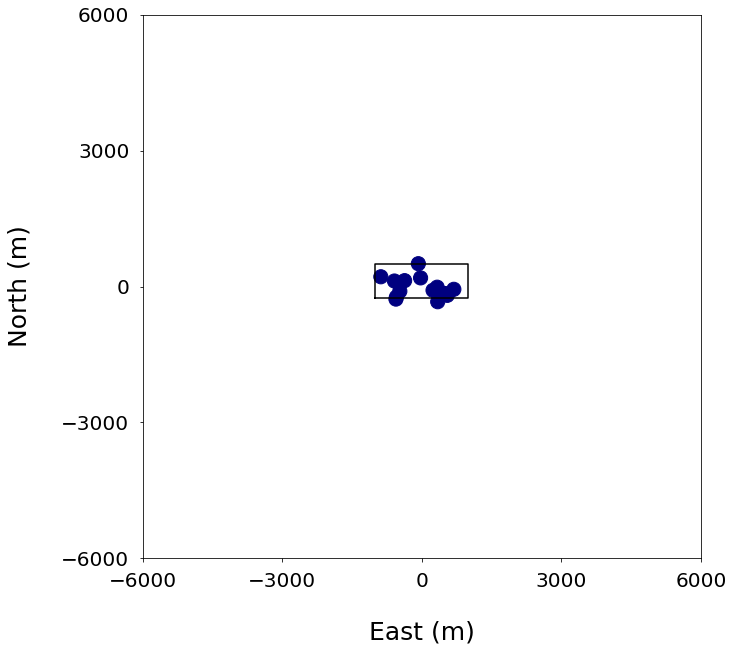

In [21]:
figure = plt.figure(figsize=(10,10))
ax = figure.gca()

individuo_0 = ax.scatter(coodY2, coodX2, c=incl2, cmap='jet', s = 200.0)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
corpo = plt.plot(ys1,xs1,'k-')

'''xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
corpo2 = plt.plot(ys2,xs2,'k-')

xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]
ys3 = [pointy[4], pointy[5], pointy[5], pointy[4], pointy[4]]
corpo3 = plt.plot(ys3,xs3,'k-')

xs4 = [pointx[6], pointx[6], pointx[7], pointx[7], pointx[6]]
ys4 = [pointy[6], pointy[7], pointy[7], pointy[6], pointy[6]]
corpo4 = plt.plot(ys4,xs4,'k-')'''

'''xs5 = [pointx[8], pointx[8], pointx[9], pointx[9], pointx[8]]
ys5 = [pointy[8], pointy[9], pointy[9], pointy[8], pointy[8]]
corpo5 = plt.plot(xs5,ys5,'k-')'''

# Labels
ax.set_xlabel('East (m)', size = 25, labelpad = 30)
ax.set_ylabel('North (m)', size = 25, labelpad = 30)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_yticks(np.linspace(Y.min(), Y.max(), 5))
ax.tick_params(labelsize = 20, pad = 10)

plt.show()

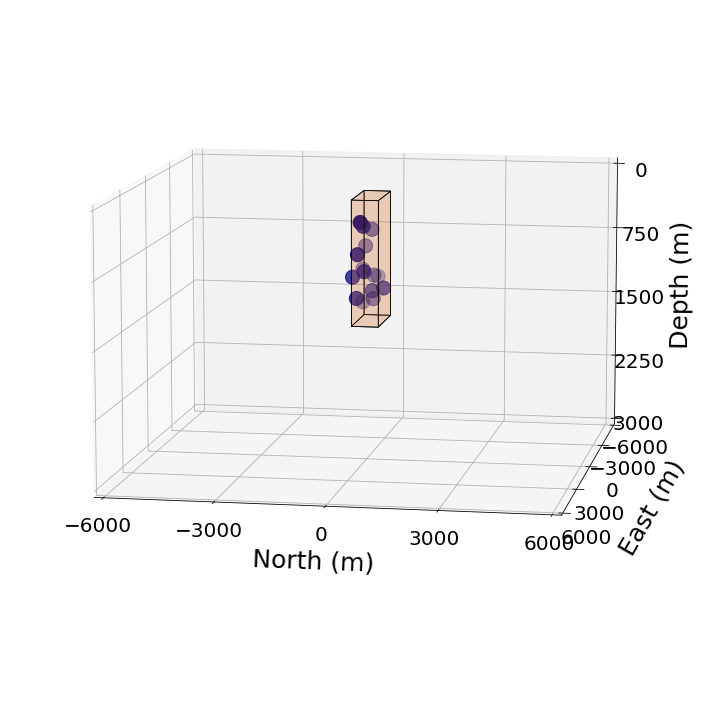

In [22]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')

fig01 = Poly3DCollection(vert1, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

'''fig02 = Poly3DCollection(vert2, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig02.set_facecolor('chocolate')
ax.add_collection3d(fig02)

fig03 = Poly3DCollection(vert3, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig03.set_facecolor('chocolate')
ax.add_collection3d(fig03)

fig04 = Poly3DCollection(vert4, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig04.set_facecolor('chocolate')
ax.add_collection3d(fig04)'''

'''fig05 = Poly3DCollection(vert5, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig05.set_facecolor('chocolate')
ax.add_collection3d(fig05)'''

individuo0 = ax.scatter(coodX3, coodY3, coodZ3, c=incl3, depthshade=True, cmap='jet', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(0., 3000)
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(y.min(), y.max(), 5))
ax.set_zticks(np.linspace(0, 3000, 5))
ax.tick_params(labelsize = 20, pad = 10)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)

# Visualization angle
ax.view_init(190,260)

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/final_3d.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/final_3d.pdf", dpi=300, bbox_inches='tight')
plt.show()

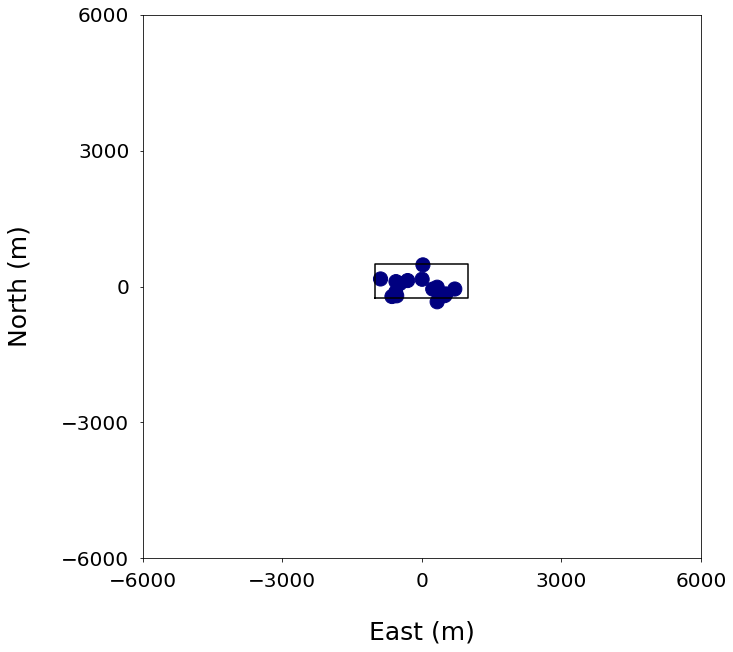

In [23]:
figure = plt.figure(figsize=(10,10))
ax = figure.gca()

individuo_0 = ax.scatter(coodY3, coodX3, c=incl3, cmap='jet', s = 200.0)

xs1 = [pointx[0], pointx[0], pointx[1], pointx[1], pointx[0]]
ys1 = [pointy[0], pointy[1], pointy[1], pointy[0], pointy[0]]
corpo = plt.plot(ys1,xs1,'k-')

'''xs2 = [pointx[2], pointx[2], pointx[3], pointx[3], pointx[2]]
ys2 = [pointy[2], pointy[3], pointy[3], pointy[2], pointy[2]]
corpo2 = plt.plot(ys2,xs2,'k-')

xs3 = [pointx[4], pointx[4], pointx[5], pointx[5], pointx[4]]
ys3 = [pointy[4], pointy[5], pointy[5], pointy[4], pointy[4]]
corpo3 = plt.plot(ys3,xs3,'k-')

xs4 = [pointx[6], pointx[6], pointx[7], pointx[7], pointx[6]]
ys4 = [pointy[6], pointy[7], pointy[7], pointy[6], pointy[6]]
corpo4 = plt.plot(ys4,xs4,'k-')'''

'''xs5 = [pointx[8], pointx[8], pointx[9], pointx[9], pointx[8]]
ys5 = [pointy[8], pointy[9], pointy[9], pointy[8], pointy[8]]
corpo5 = plt.plot(xs5,ys5,'k-')'''

# Labels
ax.set_xlabel('East (m)', size = 25, labelpad = 30)
ax.set_ylabel('North (m)', size = 25, labelpad = 30)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_yticks(np.linspace(Y.min(), Y.max(), 5))
ax.tick_params(labelsize = 20, pad = 10)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/final_2d.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/final_2d.pdf", dpi=300, bbox_inches='tight')
plt.show()

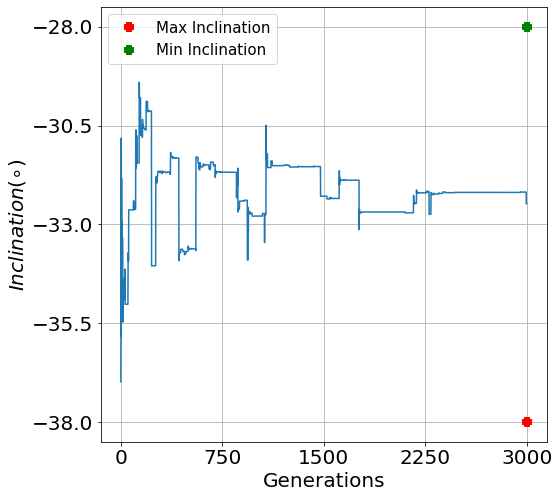

In [24]:
x_incl = np.linspace(0, len(incl_rodada), len(incl_rodada))
plt.figure(figsize=(8, 8))
plt.plot(x_incl, incl_rodada)
incl_max = plt.plot(np.max(x_incl),(-38.0),'r+', mew = 10.0, label = 'Max Inclination')
incl_mim = plt.plot(np.max(x_incl),(-28.0),'g+', mew = 10.0, label = 'Min Inclination')
#incl_mim = plt.plot(np.max(x_incl),(0.0),'b+', mew = 10.0, label = 'True Inclination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
#plt.legend([incl_v, incl_c], ['Inclinação magnética da fonte', 'Inclinação magnética calculada'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$Inclination(\circ)$', fontsize=20)
plt.xticks(np.linspace(x_incl.min(), x_incl.max(), 5), fontsize = 20)
plt.yticks(np.linspace(-38.0, -28.0, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/incl.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/incl.pdf", dpi=300, bbox_inches='tight')
plt.show()

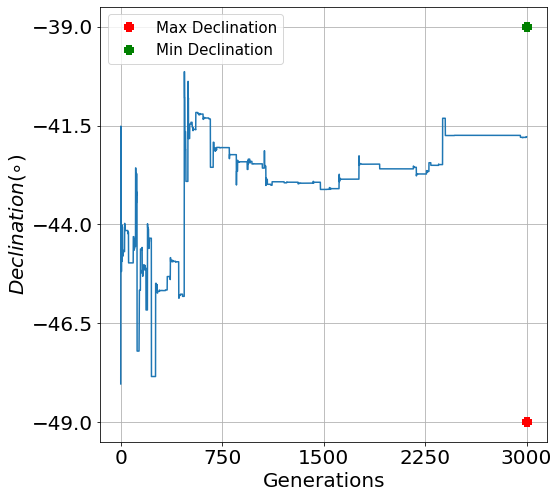

In [25]:
x_decl = np.linspace(0, len(decl_rodada), len(decl_rodada))
fig = plt.figure(figsize=(8, 8))
plt.plot(x_decl, decl_rodada)
decl_max = plt.plot(np.max(x_decl),(-49.0),'r+', mew = 10.0, label = 'Max Declination')
decl_mim = plt.plot(np.max(x_decl),(-39.0),'g+', mew = 10.0, label = 'Min Declination')
#decl_true = plt.plot(np.max(x_decl),(0.0),'b+', mew = 10.0, label = 'True Declination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$Declination(\circ)$', fontsize=20)
plt.xticks(np.linspace(x_decl.min(), x_decl.max(), 5), fontsize = 20)
plt.yticks(np.linspace(-49.0, -39.0, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/decl.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/decl.png", dpi=300, bbox_inches='tight')
plt.show()

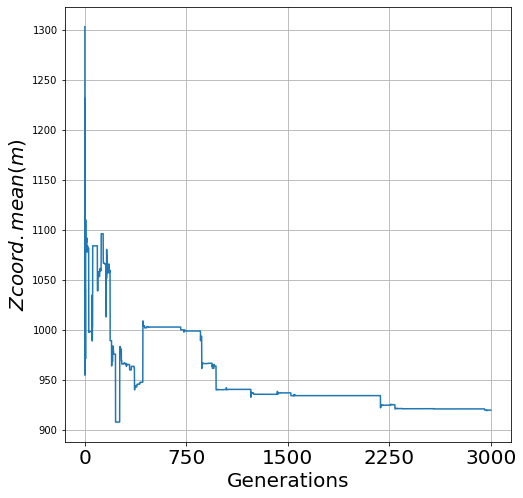

In [26]:
x_z = np.linspace(0, len(z_rodada), len(z_rodada))
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.plot(x_z, z_rodada)
#z_max = plt.plot(np.max(x_z),(3000.0),'r+', mew = 10.0, label = 'Max Z coord.')
#z_mim = plt.plot(np.max(x_z),(0.0),'g+', mew = 10.0, label = 'Min Z coord.')
#decl_true = plt.plot(np.max(x_decl),(0.0),'b+', mew = 10.0, label = 'True Declination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
#plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('$Z coord. mean(m)$', fontsize=20)
plt.xticks(np.linspace(x_z.min(), x_z.max(), 5), fontsize = 20)
#plt.yticks(np.linspace(-5.0, 5.0, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/zmean.pdf", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/zmean.png", dpi=300, bbox_inches='tight')
plt.show()

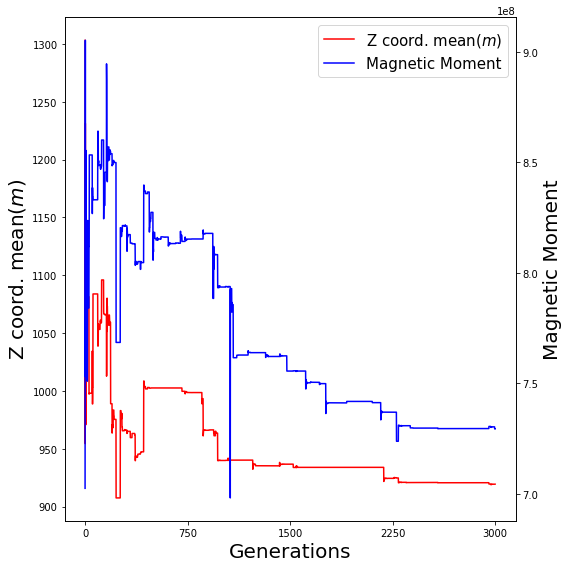

In [27]:
plt.rcParams["figure.figsize"] = [8.0, 8.0]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
l1, = ax1.plot(x_z, z_rodada, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(x_z, mom_rodada, color='blue')
ax1.set_xlabel('Generations', fontsize=20)
ax1.set_ylabel('Z coord. mean$(m)$', fontsize=20)
ax2.set_ylabel('Magnetic Moment', fontsize=20)
plt.legend([l1, l2], ["Z coord. mean$(m)$", "Magnetic Moment"], fontsize=15)
plt.xticks(np.linspace(x_z.min(), x_z.max(), 5), fontsize = 20)
#ax1.set_xticks(np.linspace(x_z.min(), x_z.max(), 5))
#ax1.set_xticklabels(np.linspace(x_z.min(), x_z.max(), 5), fontsize=16)
#ax1.set_yticks(np.linspace(min(z_rodada), max(z_rodada), 5))
#ax1.set_yticklabels(np.linspace(min(z_rodada), max(z_rodada), 5), fontsize=16)
#ax2.set_yticks(np.linspace(min(mom_rodada), max(mom_rodada), 5))
#ax2.set_yticklabels(np.linspace(min(mom_rodada), max(mom_rodada), 5), fontsize=16)
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/momXz.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/momXZ.pdf", dpi=300, bbox_inches='tight')
plt.show()

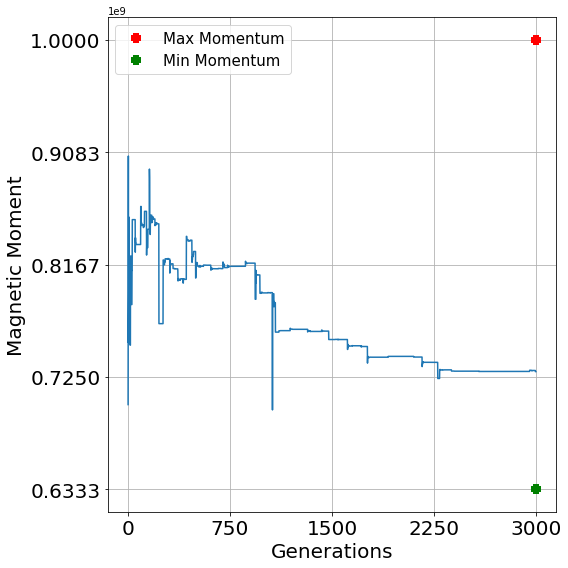

In [28]:
x_mom = np.linspace(0, len(mom_rodada), len(mom_rodada))
fig = plt.figure(figsize=(8, 8))
plt.plot(x_mom, mom_rodada)

mom_max = plt.plot(np.max(x_mom),(1.5e10/15),'r+', mew = 10.0, label = 'Max Momentum')
mom_mim = plt.plot(np.max(x_mom),(9.5e9/15),'g+', mew = 10.0, label = 'Min Momentum')
#mom_mim = plt.plot(np.max(x_mom),(3.8e10 / 20),'b+', mew = 10.0, label = 'True Momentum')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=20)
plt.ylabel('Magnetic Moment', fontsize=20)
plt.xticks(np.linspace(x_mom.min(), x_mom.max(), 5), fontsize = 20)
plt.yticks(np.linspace(1.5e10/15, 9.5e9/15, 5), fontsize = 20)
plt.grid()
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/mom.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_sintetico/Dique_inclinado/14_09_2022_20_14/mom.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [29]:
pop = ga.population
data_e_hora_atuais = datetime.now()
data_e_hora = data_e_hora_atuais.strftime('%d_%m_%Y_%H_%M')

dicionario = {'Data da Modelagem': data_e_hora,
              'Tipo de Teste': 'Algoritmo genético com o método alternativo 5X1',
              'números de corpos': 1,
              'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [pointx[0], pointx[1], pointy[0], pointy[1], pointz[0], pointz[1]],
              'Informação magnética da fonte (Incl, Decl, Momento)': [I, D, momento],
              'Parâmetros da população inicial': pop
              }

print(dicionario)

incl_rodada = np.array(incl_rodada)
decl_rodada = np.array(decl_rodada)
fit_rodada = np.array(fit_rodada)
phi_rodada = np.array(phi_rodada)#np.zeros((5,5))#np.array(phi_rodada)#np.array(phi_rodada)
theta_rodada = np.array(theta_rodada)#np.zeros((5,5))#np.array(theta_rodada)#np.array(theta_rodada)

#salve_doc.create_diretorio_dipolos(dicionario, frist_ind, mid_ind, last_ind, incl_rodada, decl_rodada, fit_rodada, phi_rodada, theta_rodada)

{'Data da Modelagem': '15_09_2022_15_28', 'Tipo de Teste': 'Algoritmo genético com o método alternativo 5X1', 'números de corpos': 1, 'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [-250.0, 500.0, -1000.0, 1000.0, 100.0, 1500.0], 'Informação magnética da fonte (Incl, Decl, Momento)': [5.0, 70.0, 1900000000.0], 'Parâmetros da população inicial': {'ymax': 3000.0, 'ymin': -3000.0, 'xmax': 3000.0, 'xmin': -3000.0, 'zlim': 0.0, 'z_min': 2000.0, 'n_dip': 15, 'n_pop': 100, 'inclmax': -28.0, 'inclmin': -38.0, 'declmax': -39.0, 'declmin': -49.0, 'mmax': 1000000000.0, 'mmin': 633333333.3333334, 'homogeneo': True}}
